In [ ]:
import pandas as pd

df = pd.read_excel('/content/datasetfix.xlsx')
df.head()

,Tanggal,id_transaksi,Items
0,2020-08-01,1,"lampu 11 watt,paku 1"",gembok 30mm,lampu 23 wat..."
1,2020-08-01,2,"Martil,paku 1.5"",paku 2"",engsel pintu,kabel tu..."
2,2020-08-01,3,"engsel pintu,engsel jendela,gembok 30mm,handle..."
3,2020-08-01,4,"grendel gembok,paku beton 3"",steker,kuas 3"",ku..."
4,2020-08-01,5,"steker,stop kontak lubang 4,kabel serabut,pasir"


In [ ]:
df.isna().sum()

Tanggal         0
id_transaksi    0
Items           0
dtype: int64

In [ ]:
df.dtypes

Tanggal         datetime64[ns]
id_transaksi             int64
Items                   object
dtype: object

In [ ]:
df['tahun'] = pd.DatetimeIndex(df['Tanggal']).year
df['bulan'] = pd.DatetimeIndex(df['Tanggal']).month
df['hari'] = pd.DatetimeIndex(df['Tanggal']).day
df.head()

,Tanggal,id_transaksi,Items,tahun,bulan,hari
0,2020-08-01,1,"lampu 11 watt,paku 1"",gembok 30mm,lampu 23 wat...",2020,8,1
1,2020-08-01,2,"Martil,paku 1.5"",paku 2"",engsel pintu,kabel tu...",2020,8,1
2,2020-08-01,3,"engsel pintu,engsel jendela,gembok 30mm,handle...",2020,8,1
3,2020-08-01,4,"grendel gembok,paku beton 3"",steker,kuas 3"",ku...",2020,8,1
4,2020-08-01,5,"steker,stop kontak lubang 4,kabel serabut,pasir",2020,8,1


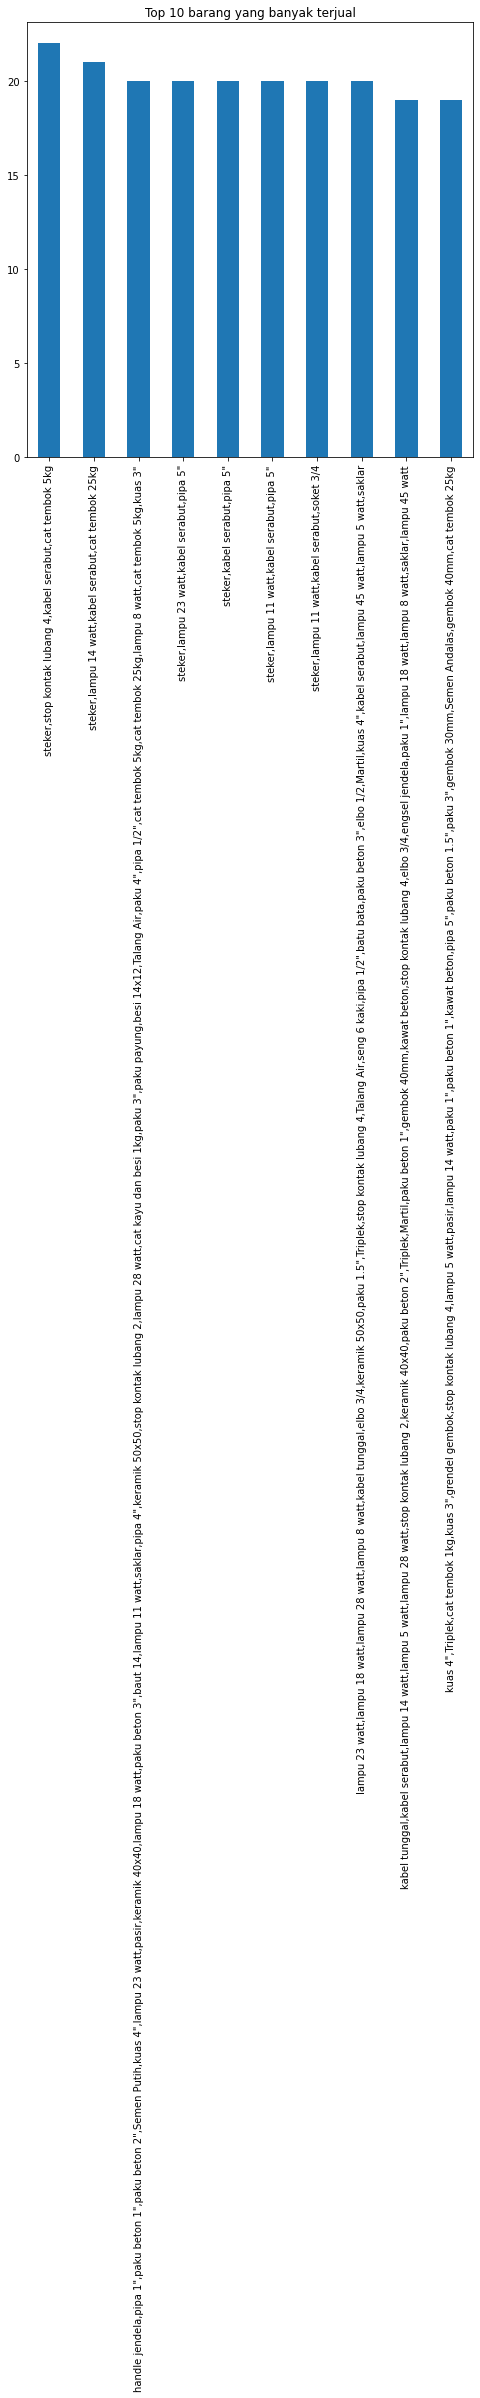

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
df.Items.value_counts().head(10).plot.bar()
plt.title('Top 10 barang yang banyak terjual')
plt.show()

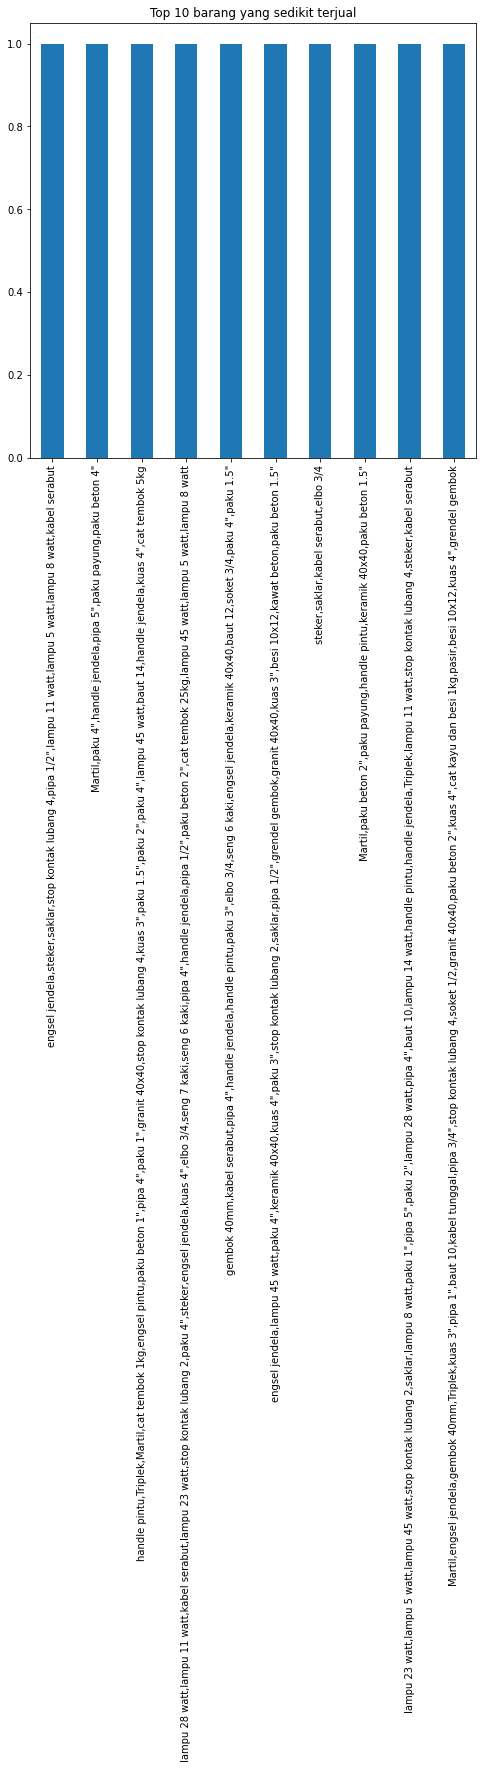

In [ ]:
plt.figure(figsize = (8,8))
df.Items.value_counts().tail(10).plot.bar()
plt.title('Top 10 barang yang sedikit terjual')
plt.show()

In [ ]:
#cek jumlah barang berdasarkan bulan (tidak memperdulikan tahun)

month = df.groupby(df['Tanggal'].dt.strftime('%m'))['Items'].count()
month

Tanggal
01     907
02     835
03     950
04     856
05     935
06     911
07     873
08    1059
09     864
10     947
11     891
12     939
Name: Items, dtype: int64

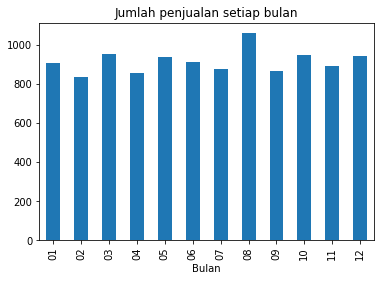

In [ ]:
month.plot(x='Tanggal', kind='bar')
plt.xlabel('Bulan')
plt.title('Jumlah penjualan setiap bulan')
plt.show()

Text(0.5, 1.0, 'Jumlah penjualan setiap bulan')

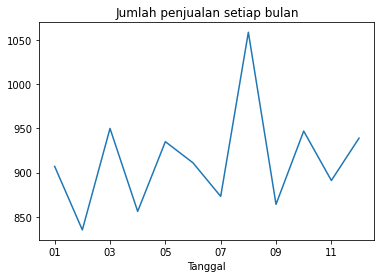

In [ ]:
month.plot()
plt.title('Jumlah penjualan setiap bulan')

In [ ]:
# cek jumlah barang yang dibeli berdasarkan bulan dan tahun

month2 = df.groupby(['tahun','bulan']).agg({'Items':'count'}).reset_index()
month2 = month2.rename(columns={'Items': 'jumlah_barang'})
month2

,tahun,bulan,jumlah_barang
0,2020,8,431
1,2020,9,433
2,2020,10,429
3,2020,11,448
4,2020,12,478
5,2021,1,454
6,2021,2,435
7,2021,3,467
8,2021,4,434
9,2021,5,468


In [ ]:
df_cust = df.groupby(['tahun','bulan']).agg({'id_transaksi':'nunique'}).reset_index()
df_cust = df_cust.rename(columns={'id_transaksi': 'jumlah_customers'})
df_cust

,tahun,bulan,jumlah_customers
0,2020,8,431
1,2020,9,433
2,2020,10,429
3,2020,11,448
4,2020,12,478
5,2021,1,454
6,2021,2,435
7,2021,3,467
8,2021,4,434
9,2021,5,468


In [ ]:
df_freq = df.groupby(['tahun','bulan','id_transaksi',]).agg({'Items':'count'}).reset_index()
df_freq = df_freq.rename(columns={'Items': 'jumlah_barang'})
df_freq

,tahun,bulan,id_transaksi,jumlah_barang
0,2020,8,1,1
1,2020,8,2,1
2,2020,8,3,1
3,2020,8,4,1
4,2020,8,5,1
...,...,...,...,...
10962,2022,8,10963,1
10963,2022,8,10964,1
10964,2022,8,10965,1
10965,2022,8,10966,1


In [ ]:
df_group = df.groupby(['id_transaksi','Tanggal'])['Items'].agg(lambda x: ','.join(x.dropna())).reset_index()
df_group.sort_values(by='Tanggal', ascending=True, inplace=True,ignore_index=True)
df_group

,id_transaksi,Tanggal,Items
0,1,2020-08-01,"lampu 11 watt,paku 1"",gembok 30mm,lampu 23 wat..."
1,19,2020-08-01,"cat kayu dan besi 1kg,saklar,steker,pipa 1"",gr..."
2,18,2020-08-01,"cat tembok 25kg,gembok 30mm,engsel pintu,cat t..."
3,17,2020-08-01,"Martil,kuas 4"",paku 1.5"",gembok 30mm,kuas 4"",p..."
4,16,2020-08-01,"lampu 23 watt,handle pintu,lampu 28 watt,grani..."
...,...,...,...
10962,10954,2022-08-16,"elbo 3/4,lampu 45 watt,kawat beton,Semen Andal..."
10963,10953,2022-08-16,"keramik 40x40,Semen Andalas,kabel serabut,lamp..."
10964,10966,2022-08-16,"steker,stop kontak lubang 4,kabel serabut,elbo..."
10965,10959,2022-08-16,"Martil,paku 4"",paku payung,engsel salon,seng 7..."


In [ ]:
dataset = []
for i in range(len(df_group['Items'])):
  new_val = df_group['Items'].iloc[i].split(',')
  dataset.append(new_val)

dataset

[['lampu 11 watt',
  'paku 1"',
  'gembok 30mm',
  'lampu 23 watt',
  'pipa 3/4"',
  'pipa 2"',
  'pipa 5"',
  'grendel gembok',
  'besi 10x12',
  'soket 3/4',
  'seng 7 kaki'],
 ['cat kayu dan besi 1kg',
  'saklar',
  'steker',
  'pipa 1"',
  'granit 40x40',
  'lampu 8 watt',
  'lampu 5 watt',
  'kabel serabut'],
 ['cat tembok 25kg',
  'gembok 30mm',
  'engsel pintu',
  'cat tembok 5kg',
  'kuas 3"',
  'pipa 3/4"',
  'baut 14',
  'gembok 40mm',
  'seng 6 kaki',
  'kawat beton',
  'lampu 23 watt',
  'kuas 4"',
  'granit 40x40',
  'paku beton 4"',
  'lampu 14 watt',
  'stop kontak lubang 4',
  'pipa 4"',
  'paku beton 3"',
  'saklar',
  'handle pintu',
  'Martil',
  'Triplek'],
 ['Martil',
  'kuas 4"',
  'paku 1.5"',
  'gembok 30mm',
  'kuas 4"',
  'paku 4"',
  'paku beton 1.5"'],
 ['lampu 23 watt',
  'handle pintu',
  'lampu 28 watt',
  'granit 40x40',
  'paku payung',
  'saklar',
  'lampu 45 watt',
  'kawat beton',
  'fitting',
  'baut 12',
  'cat tembok 5kg',
  'paku beton 4"',
  'Se

In [ ]:
df_group['Items'].iloc[0].split(',')

['lampu 11 watt',
 'paku 1"',
 'gembok 30mm',
 'lampu 23 watt',
 'pipa 3/4"',
 'pipa 2"',
 'pipa 5"',
 'grendel gembok',
 'besi 10x12',
 'soket 3/4',
 'seng 7 kaki']

In [ ]:
len(df_group['Items'])

10967

Frequent itemsets generation

In [ ]:
# penjualan 10 barang dalam sehari, menggunakan waktu mingguan
10*7/10967

0.006382784717789733

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_new = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_new, min_support=0.006382784717789733, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.317954,(Martil)
1,0.147716,(Semen Andalas)
2,0.131577,(Semen Putih)
3,0.143886,(Talang Air)
4,0.226862,(Triplek)
...,...,...
625178,0.006930,"(paku 2"", kabel serabut, lampu 8 watt, saklar,..."
625179,0.006383,"(lampu 14 watt, steker, kabel serabut, lampu 2..."
625180,0.007021,"(lampu 14 watt, steker, kabel serabut, lampu 8..."
625181,0.006565,"(lampu 14 watt, lampu 5 watt, kabel serabut, s..."


In [ ]:
df_new

,Martil,Semen Andalas,Semen Putih,Talang Air,Triplek,batu bata,baut 10,baut 12,baut 14,besi 10x12,...,"pipa 4""","pipa 5""",saklar,seng 6 kaki,seng 7 kaki,soket 1/2,soket 3/4,steker,stop kontak lubang 2,stop kontak lubang 4
0,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,True,False,False,False,True,False,False,False,True,False,...,True,False,True,True,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,True,False,False,...,True,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,False,True,False,False,True,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
10963,True,True,False,True,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
10964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
10965,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Rule Generation

In [ ]:
from mlxtend.frequent_patterns import association_rules

rule = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Semen Andalas, pipa 5"", batu bata, baut 10)","(kuas 4"")",0.006565,0.409501,0.006565,1.0,2.441995,0.003877,inf
1,"(lampu 14 watt, Semen Andalas, pipa 3/4"", paku...","(kuas 4"")",0.008662,0.409501,0.008662,1.0,2.441995,0.005115,inf
2,"(paku beton 1"", Semen Andalas, pipa 5"", paku 2"")","(kuas 4"")",0.007203,0.409501,0.007203,1.0,2.441995,0.004254,inf
3,"(Semen Andalas, stop kontak lubang 2, pipa 3/4...","(kuas 4"")",0.007477,0.409501,0.007477,1.0,2.441995,0.004415,inf
4,"(Semen Putih, elbo 3/4, paku beton 1.5"", batu ...","(kuas 4"")",0.006474,0.409501,0.006474,1.0,2.441995,0.003823,inf
...,...,...,...,...,...,...,...,...,...
11268,"(saklar, kabel serabut, lampu 11 watt, stop ko...","(lampu 14 watt, lampu 5 watt, stop kontak luba...",0.006565,0.086259,0.006565,1.0,11.593023,0.005999,inf
11269,"(saklar, kabel serabut, lampu 11 watt, paku be...","(lampu 14 watt, lampu 5 watt, stop kontak luba...",0.006565,0.093371,0.006565,1.0,10.709961,0.005952,inf
11270,"(saklar, kabel serabut, stop kontak lubang 2, ...","(lampu 14 watt, lampu 5 watt, lampu 11 watt)",0.006565,0.080058,0.006565,1.0,12.490888,0.006040,inf
11271,"(saklar, lampu 5 watt, kabel serabut, lampu 11...","(lampu 14 watt, stop kontak lubang 2, stop kon...",0.006565,0.064284,0.006565,1.0,15.556028,0.006143,inf
